In [33]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import seaborn as sns
from models.MLP import MLP, plot_training
from utils.dataPreprocessing import data_preprocessing

In [34]:
df_data = pd.read_csv('../data/train.csv')
df_data.head()

,id,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,1,Acer_Opalus,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,...,0.007812,0.000000,0.002930,0.002930,0.035156,0.0,0.0,0.004883,0.000000,0.025391
1,2,Pterocarya_Stenoptera,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,...,0.000977,0.000000,0.000000,0.000977,0.023438,0.0,0.0,0.000977,0.039062,0.022461
2,3,Quercus_Hartwissiana,0.005859,0.009766,0.019531,0.007812,0.003906,0.005859,0.068359,0.0,...,0.154300,0.000000,0.005859,0.000977,0.007812,0.0,0.0,0.000000,0.020508,0.002930
3,5,Tilia_Tomentosa,0.000000,0.003906,0.023438,0.005859,0.021484,0.019531,0.023438,0.0,...,0.000000,0.000977,0.000000,0.000000,0.020508,0.0,0.0,0.017578,0.000000,0.047852
4,6,Quercus_Variabilis,0.005859,0.003906,0.048828,0.009766,0.013672,0.015625,0.005859,0.0,...,0.096680,0.000000,0.021484,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.031250


In [35]:
X, t = data_preprocessing(df_data, normalized=True, one_hot=True)
X_train, X_test, t_train, t_test = train_test_split(X, t, test_size=0.3, random_state=0)

## Training with a stochastic gradient descent

In [36]:
model = MLP(num_epochs=500)
model.set_model(input_size=X_train.shape[1], output_size=t_train.shape[1], activation_function='relu')
model.set_optimizer(optim='SGD', lr=1e-2, reg=0)

In [37]:
loss_train, accuracy_train, loss_test, accuracy_test = model.training(X_train, t_train, X_test, t_test)

Epoch 1/500, Loss: 4.59363, Accuracy: 1.01%
Epoch 2/500, Loss: 4.53696, Accuracy: 2.45%
Epoch 3/500, Loss: 4.30688, Accuracy: 5.77%
Epoch 4/500, Loss: 3.80201, Accuracy: 9.67%
Epoch 5/500, Loss: 3.14360, Accuracy: 18.47%
Epoch 6/500, Loss: 2.42272, Accuracy: 32.61%
Epoch 7/500, Loss: 1.78944, Accuracy: 45.89%
Epoch 8/500, Loss: 1.32068, Accuracy: 58.59%
Epoch 9/500, Loss: 0.95473, Accuracy: 70.27%
Epoch 10/500, Loss: 0.70464, Accuracy: 79.22%
Epoch 11/500, Loss: 0.48348, Accuracy: 85.43%
Epoch 12/500, Loss: 0.34804, Accuracy: 89.90%
Epoch 13/500, Loss: 0.23150, Accuracy: 95.09%
Epoch 14/500, Loss: 0.17409, Accuracy: 95.96%
Epoch 15/500, Loss: 0.15100, Accuracy: 96.39%
Epoch 16/500, Loss: 0.09195, Accuracy: 97.98%
Epoch 17/500, Loss: 0.06851, Accuracy: 98.56%
Epoch 18/500, Loss: 0.10357, Accuracy: 97.98%
Epoch 19/500, Loss: 0.07131, Accuracy: 98.56%
Epoch 20/500, Loss: 0.05555, Accuracy: 98.99%
Epoch 21/500, Loss: 0.02753, Accuracy: 99.71%
Epoch 22/500, Loss: 0.07842, Accuracy: 98.12%
E

In [8]:
print("Model accuracy of {:.2f}% on test data".format(accuracy_test[-1]*100))

Model accuracy of 82.49% on test data


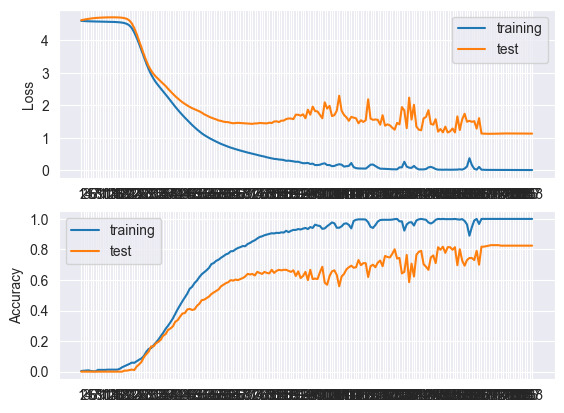

In [9]:
plot_training(loss_train, accuracy_train, loss_test, accuracy_test, 'test')

### Add a regularization term

In [10]:
model.set_optimizer(optim='SGD', lr=1e-2, reg=1e-3)
loss_train, accuracy_train, loss_test, accuracy_test = model.training(X_train, t_train, X_test, t_test)

Epoch 1/500, Loss: 4.60441, Accuracy: 0.72%
Epoch 2/500, Loss: 4.59728, Accuracy: 0.58%
Epoch 3/500, Loss: 4.59246, Accuracy: 0.43%
Epoch 4/500, Loss: 4.58894, Accuracy: 0.58%
Epoch 5/500, Loss: 4.58646, Accuracy: 0.43%
Epoch 6/500, Loss: 4.58451, Accuracy: 0.58%
Epoch 7/500, Loss: 4.58290, Accuracy: 0.58%
Epoch 8/500, Loss: 4.58157, Accuracy: 1.01%
Epoch 9/500, Loss: 4.58031, Accuracy: 1.01%
Epoch 10/500, Loss: 4.57915, Accuracy: 0.87%
Epoch 11/500, Loss: 4.57793, Accuracy: 1.01%
Epoch 12/500, Loss: 4.57666, Accuracy: 1.01%
Epoch 13/500, Loss: 4.57520, Accuracy: 1.44%
Epoch 14/500, Loss: 4.57342, Accuracy: 1.73%
Epoch 15/500, Loss: 4.57119, Accuracy: 2.02%
Epoch 16/500, Loss: 4.56818, Accuracy: 2.45%
Epoch 17/500, Loss: 4.56399, Accuracy: 2.45%
Epoch 18/500, Loss: 4.55754, Accuracy: 2.74%
Epoch 19/500, Loss: 4.54723, Accuracy: 2.89%
Epoch 20/500, Loss: 4.52958, Accuracy: 2.89%
Epoch 21/500, Loss: 4.49790, Accuracy: 3.17%
Epoch 22/500, Loss: 4.44152, Accuracy: 2.89%
Epoch 23/500, Loss:

In [11]:
print("Model accuracy of {:.2f}% on test data".format(accuracy_test[-1]*100))

Model accuracy of 69.36% on test data


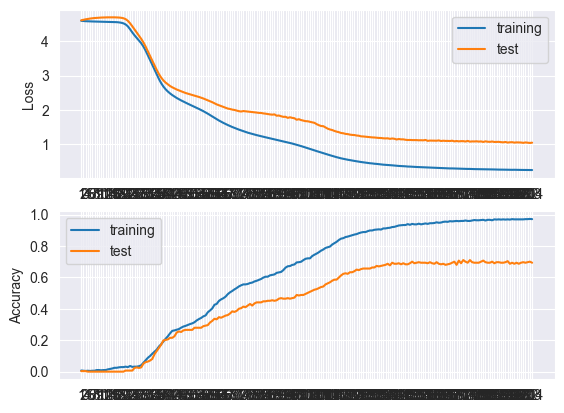

In [13]:
plot_training(loss_train, accuracy_train, loss_test, accuracy_test, 'test')

## hyperparameters optimization

In [12]:
reg_choices = [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
lr_choices = [1e-4, 1e-3, 1e-2, 1e-1]
best_params, accuracy_historic = model.k_fold_cross_validation(X_train, t_train, lr_choices=lr_choices, reg_choices=reg_choices)

testing parameters: learning_rate = 1e-04,    regularization = 1e-09
K = 0, accuracy: 0.007
K = 1, accuracy: 0.007
K = 2, accuracy: 0.014
K = 3, accuracy: 0.007
K = 4, accuracy: 0.000
Best val accuracy: 0.007 | lr: 1e-04 | l2_reg: 1e-09
testing parameters: learning_rate = 1e-04,    regularization = 1e-08
K = 0, accuracy: 0.000
K = 1, accuracy: 0.007
K = 2, accuracy: 0.000
K = 3, accuracy: 0.000
K = 4, accuracy: 0.014
testing parameters: learning_rate = 1e-04,    regularization = 1e-07
K = 0, accuracy: 0.000
K = 1, accuracy: 0.000
K = 2, accuracy: 0.014
K = 3, accuracy: 0.007
K = 4, accuracy: 0.000
testing parameters: learning_rate = 1e-04,    regularization = 1e-06
K = 0, accuracy: 0.007
K = 1, accuracy: 0.000
K = 2, accuracy: 0.000
K = 3, accuracy: 0.000
K = 4, accuracy: 0.007
testing parameters: learning_rate = 1e-04,    regularization = 1e-05
K = 0, accuracy: 0.000
K = 1, accuracy: 0.014
K = 2, accuracy: 0.000
K = 3, accuracy: 0.000
K = 4, accuracy: 0.007
testing parameters: learnin

<Axes: >

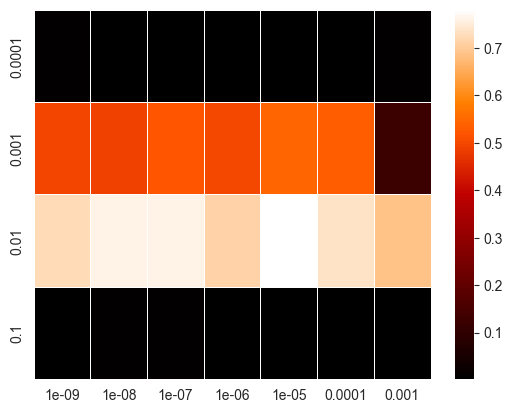

In [13]:
ax = sns.heatmap(accuracy_historic, linewidths=0.5, cmap='gist_heat', 
                 xticklabels=reg_choices,     
                 yticklabels=lr_choices)
ax.set(xlabel='weight_decay', ylabel='learning rate')

In [14]:
best_params

(0.01, 1e-05)

### Complet learning with the best hyperparameters

In [14]:
model.set_optimizer(optim='SGD', lr=best_params[0], reg=best_params[1])
loss_train, accuracy_train, loss_test, accuracy_test = model.training(X_train, t_train, X_test, t_test)

Epoch 1/500, Loss: 4.60533, Accuracy: 0.72%
Epoch 2/500, Loss: 4.59805, Accuracy: 1.01%
Epoch 3/500, Loss: 4.59307, Accuracy: 1.15%
Epoch 4/500, Loss: 4.58953, Accuracy: 0.87%
Epoch 5/500, Loss: 4.58693, Accuracy: 0.87%
Epoch 6/500, Loss: 4.58494, Accuracy: 1.01%
Epoch 7/500, Loss: 4.58329, Accuracy: 1.30%
Epoch 8/500, Loss: 4.58190, Accuracy: 1.30%
Epoch 9/500, Loss: 4.58061, Accuracy: 1.30%
Epoch 10/500, Loss: 4.57934, Accuracy: 1.30%
Epoch 11/500, Loss: 4.57800, Accuracy: 1.30%
Epoch 12/500, Loss: 4.57650, Accuracy: 1.44%
Epoch 13/500, Loss: 4.57472, Accuracy: 1.44%
Epoch 14/500, Loss: 4.57257, Accuracy: 1.59%
Epoch 15/500, Loss: 4.56970, Accuracy: 2.02%
Epoch 16/500, Loss: 4.56565, Accuracy: 2.74%
Epoch 17/500, Loss: 4.55958, Accuracy: 3.17%
Epoch 18/500, Loss: 4.55002, Accuracy: 3.03%
Epoch 19/500, Loss: 4.53419, Accuracy: 3.03%
Epoch 20/500, Loss: 4.50588, Accuracy: 3.17%
Epoch 21/500, Loss: 4.45362, Accuracy: 2.89%
Epoch 22/500, Loss: 4.36363, Accuracy: 2.89%
Epoch 23/500, Loss:

In [15]:
print("Model accuracy of {:.2f}% on test data".format(accuracy_test[-1]*100))

Model accuracy of 82.83% on test data


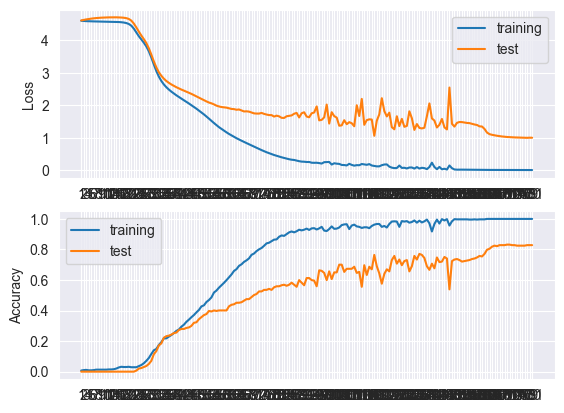

In [17]:
plot_training(loss_train, accuracy_train, loss_test, accuracy_test, 'test')

### Data normalization

In [18]:
df_data.iloc[:,2:].max()

margin1      0.087891
margin2      0.205080
margin3      0.156250
margin4      0.169920
margin5      0.111330
               ...   
texture60    0.578130
texture61    0.151370
texture62    0.375980
texture63    0.086914
texture64    0.141600
Length: 192, dtype: float64

The data are not normalized, which can unfairly give more weight to some features than to others. To overcome this problem, we normalize our data using a min-max normalization.

In [19]:
X = ((df_data.iloc[:,2:] - df_data.iloc[:,2:].min()) / (df_data.iloc[:,2:].max() - df_data.iloc[:,2:].min())).values

species = df_data['species'].unique()

# Creation of the one-hot vector for the targets matrix
t = np.zeros((len(X),species.size)) 
for i in range(species.size):
    t[df_data['species'] == species[i], i] = 1
    
X_train, X_test, t_train, t_test = train_test_split(X, t, test_size=0.3, random_state=0)

In [20]:
model.set_optimizer(optim='SGD', lr=1e-3, reg=1e-4)
loss_train, accuracy_train, loss_test, accuracy_test = model.training(X_train, t_train, X_test, t_test)

Epoch 1/500, Loss: 4.60100, Accuracy: 0.87%
Epoch 2/500, Loss: 4.59672, Accuracy: 1.15%
Epoch 3/500, Loss: 4.59280, Accuracy: 0.87%
Epoch 4/500, Loss: 4.58897, Accuracy: 1.73%
Epoch 5/500, Loss: 4.58505, Accuracy: 2.31%
Epoch 6/500, Loss: 4.58098, Accuracy: 2.89%
Epoch 7/500, Loss: 4.57661, Accuracy: 3.17%
Epoch 8/500, Loss: 4.57181, Accuracy: 3.46%
Epoch 9/500, Loss: 4.56644, Accuracy: 4.47%
Epoch 10/500, Loss: 4.56034, Accuracy: 4.33%
Epoch 11/500, Loss: 4.55339, Accuracy: 4.47%
Epoch 12/500, Loss: 4.54522, Accuracy: 2.89%
Epoch 13/500, Loss: 4.53545, Accuracy: 2.16%
Epoch 14/500, Loss: 4.52387, Accuracy: 1.73%
Epoch 15/500, Loss: 4.51023, Accuracy: 1.44%
Epoch 16/500, Loss: 4.49416, Accuracy: 1.44%
Epoch 17/500, Loss: 4.47547, Accuracy: 1.44%
Epoch 18/500, Loss: 4.45387, Accuracy: 1.59%
Epoch 19/500, Loss: 4.42904, Accuracy: 1.59%
Epoch 20/500, Loss: 4.40050, Accuracy: 1.88%
Epoch 21/500, Loss: 4.36766, Accuracy: 2.60%
Epoch 22/500, Loss: 4.32964, Accuracy: 2.60%
Epoch 23/500, Loss:

In [21]:
print("Model accuracy of {:.2f}% on test data".format(accuracy_test[-1]*100))

Model accuracy of 93.60% on test data


The model accuracy is hugely improve with normalized data.

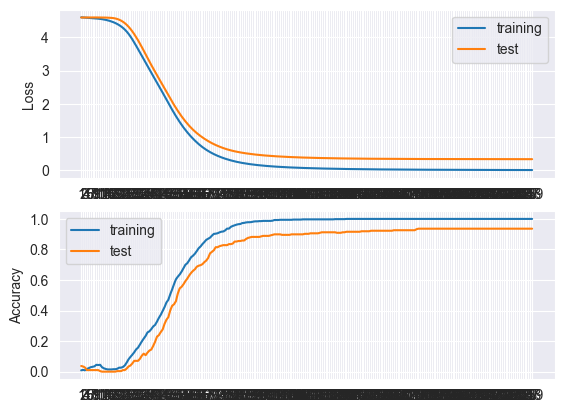

In [22]:
plot_training(loss_train, accuracy_train, loss_test, accuracy_test, 'test')

In [22]:
lr_choices = [1e-4, 1e-3, 1e-2, 1e-1]
reg_choices = [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
best_params_norm, accuracy_historic_norm = model.k_fold_cross_validation(X_train, t_train, lr_choices=lr_choices, reg_choices=reg_choices)

testing parameters: learning_rate = 1e-04,    regularization = 1e-09
K = 0, accuracy: 0.424
K = 1, accuracy: 0.468
K = 2, accuracy: 0.288
K = 3, accuracy: 0.333
K = 4, accuracy: 0.362
Best val accuracy: 0.375 | lr: 1e-04 | l2_reg: 1e-09
testing parameters: learning_rate = 1e-04,    regularization = 1e-08
K = 0, accuracy: 0.475
K = 1, accuracy: 0.381
K = 2, accuracy: 0.309
K = 3, accuracy: 0.348
K = 4, accuracy: 0.377
Best val accuracy: 0.378 | lr: 1e-04 | l2_reg: 1e-08
testing parameters: learning_rate = 1e-04,    regularization = 1e-07
K = 0, accuracy: 0.374
K = 1, accuracy: 0.396
K = 2, accuracy: 0.317
K = 3, accuracy: 0.275
K = 4, accuracy: 0.384
testing parameters: learning_rate = 1e-04,    regularization = 1e-06
K = 0, accuracy: 0.374
K = 1, accuracy: 0.374
K = 2, accuracy: 0.424
K = 3, accuracy: 0.355
K = 4, accuracy: 0.362
testing parameters: learning_rate = 1e-04,    regularization = 1e-05
K = 0, accuracy: 0.367
K = 1, accuracy: 0.460
K = 2, accuracy: 0.367
K = 3, accuracy: 0.4

<Axes: >

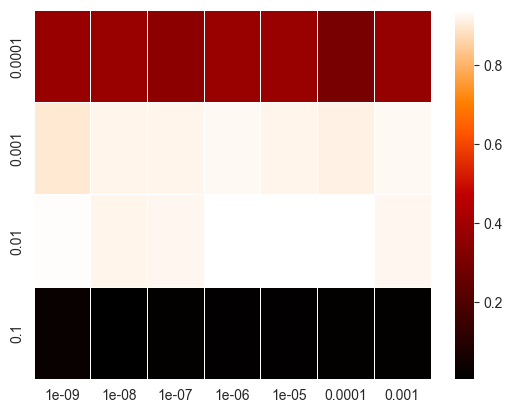

In [23]:
ax = sns.heatmap(accuracy_historic_norm, linewidths=0.5, cmap='gist_heat', 
                 xticklabels=reg_choices, 
                 yticklabels=lr_choices)
ax.set(xlabel='weight decay', ylabel='learning rate')

In [24]:
best_params_norm

(0.01, 1e-06)

### Complete learning with the best hyperparameters

In [23]:
model.set_optimizer(optim='SGD', lr=best_params_norm[0], reg=best_params_norm[1])
loss_train, accuracy_train, loss_test, accuracy_test = model.training(X_train, t_train, X_test, t_test)

Epoch 1/500, Loss: 4.59420, Accuracy: 1.44%
Epoch 2/500, Loss: 4.53874, Accuracy: 2.16%
Epoch 3/500, Loss: 4.34231, Accuracy: 3.17%
Epoch 4/500, Loss: 3.87289, Accuracy: 8.08%
Epoch 5/500, Loss: 3.18734, Accuracy: 17.32%
Epoch 6/500, Loss: 2.47515, Accuracy: 30.30%
Epoch 7/500, Loss: 1.82653, Accuracy: 45.45%
Epoch 8/500, Loss: 1.31529, Accuracy: 58.44%
Epoch 9/500, Loss: 0.97461, Accuracy: 71.43%
Epoch 10/500, Loss: 0.68659, Accuracy: 78.64%
Epoch 11/500, Loss: 0.49186, Accuracy: 85.57%
Epoch 12/500, Loss: 0.36720, Accuracy: 89.75%
Epoch 13/500, Loss: 0.26612, Accuracy: 93.07%
Epoch 14/500, Loss: 0.19703, Accuracy: 95.09%
Epoch 15/500, Loss: 0.13280, Accuracy: 96.39%
Epoch 16/500, Loss: 0.09513, Accuracy: 98.27%
Epoch 17/500, Loss: 0.10075, Accuracy: 98.56%
Epoch 18/500, Loss: 0.10700, Accuracy: 98.12%
Epoch 19/500, Loss: 0.05714, Accuracy: 99.13%
Epoch 20/500, Loss: 0.04264, Accuracy: 99.28%
Epoch 21/500, Loss: 0.03585, Accuracy: 99.13%
Epoch 22/500, Loss: 0.02274, Accuracy: 100.00%


In [24]:
print("Model accuracy of {:.2f}% on test data".format(accuracy_test[-1]*100))

Model accuracy of 94.61% on test data


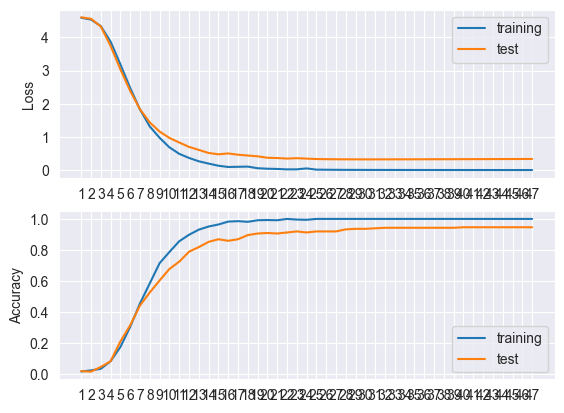

In [26]:
plot_training(loss_train, accuracy_train, loss_test, accuracy_test, 'test')

### With activation function PReLU

In [27]:
model.set_model(input_size=X_train.shape[1], output_size=t_train.shape[1], activation_function='prelu')
model.set_optimizer(optim='SGD', lr=1e-3, reg=1e-4)
loss_train, accuracy_train, loss_test, accuracy_test = model.training(X_train, t_train, X_test, t_test)

Epoch 1/500, Loss: 4.59506, Accuracy: 0.29%
Epoch 2/500, Loss: 4.59041, Accuracy: 0.58%
Epoch 3/500, Loss: 4.58552, Accuracy: 0.14%
Epoch 4/500, Loss: 4.58039, Accuracy: 0.00%
Epoch 5/500, Loss: 4.57497, Accuracy: 0.00%
Epoch 6/500, Loss: 4.56895, Accuracy: 0.29%
Epoch 7/500, Loss: 4.56211, Accuracy: 0.58%
Epoch 8/500, Loss: 4.55421, Accuracy: 2.02%
Epoch 9/500, Loss: 4.54509, Accuracy: 2.74%
Epoch 10/500, Loss: 4.53433, Accuracy: 2.74%
Epoch 11/500, Loss: 4.52159, Accuracy: 2.16%
Epoch 12/500, Loss: 4.50643, Accuracy: 1.73%
Epoch 13/500, Loss: 4.48856, Accuracy: 1.30%
Epoch 14/500, Loss: 4.46770, Accuracy: 1.30%
Epoch 15/500, Loss: 4.44353, Accuracy: 1.30%
Epoch 16/500, Loss: 4.41560, Accuracy: 1.30%
Epoch 17/500, Loss: 4.38297, Accuracy: 1.44%
Epoch 18/500, Loss: 4.34417, Accuracy: 2.45%
Epoch 19/500, Loss: 4.29702, Accuracy: 3.61%
Epoch 20/500, Loss: 4.23745, Accuracy: 5.63%
Epoch 21/500, Loss: 4.15728, Accuracy: 8.80%
Epoch 22/500, Loss: 4.03661, Accuracy: 13.13%
Epoch 23/500, Loss

In [28]:
print("Model accuracy of {:.2f}% on test data".format(accuracy_test[-1]*100))

Model accuracy of 96.97% on test data


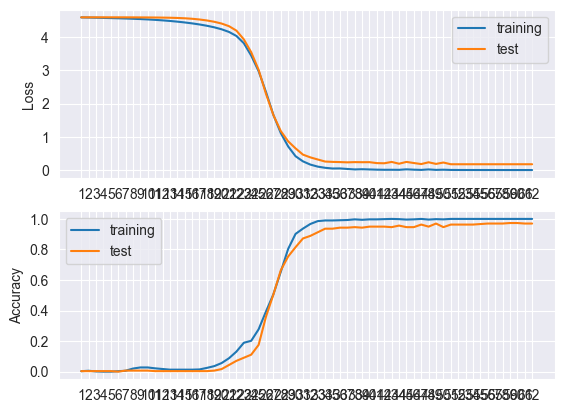

In [29]:
plot_training(loss_train, accuracy_train, loss_test, accuracy_test, 'test')

### Hyperparameters optimization

In [31]:
lr_choices = [1e-4, 1e-3, 1e-2, 1e-1]
reg_choices = [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
best_params_prelu, accuracy_historic_prelu = model.k_fold_cross_validation(X_train, t_train, lr_choices=lr_choices, reg_choices=reg_choices)

testing parameters: learning_rate = 1e-04,    regularization = 1e-09
K = 0, accuracy: 0.950
K = 1, accuracy: 0.935
K = 2, accuracy: 0.942
K = 3, accuracy: 0.935
K = 4, accuracy: 0.891
Best val accuracy: 0.931 | lr: 1e-04 | l2_reg: 1e-09
testing parameters: learning_rate = 1e-04,    regularization = 1e-08
K = 0, accuracy: 0.899
K = 1, accuracy: 0.914
K = 2, accuracy: 0.914
K = 3, accuracy: 0.920
K = 4, accuracy: 0.971
testing parameters: learning_rate = 1e-04,    regularization = 1e-07
K = 0, accuracy: 0.928
K = 1, accuracy: 0.914
K = 2, accuracy: 0.935
K = 3, accuracy: 0.971
K = 4, accuracy: 0.920
Best val accuracy: 0.934 | lr: 1e-04 | l2_reg: 1e-07
testing parameters: learning_rate = 1e-04,    regularization = 1e-06
K = 0, accuracy: 0.892
K = 1, accuracy: 0.957
K = 2, accuracy: 0.964
K = 3, accuracy: 0.964
K = 4, accuracy: 0.942
Best val accuracy: 0.944 | lr: 1e-04 | l2_reg: 1e-06
testing parameters: learning_rate = 1e-04,    regularization = 1e-05
K = 0, accuracy: 0.942
K = 1, accura

<Axes: >

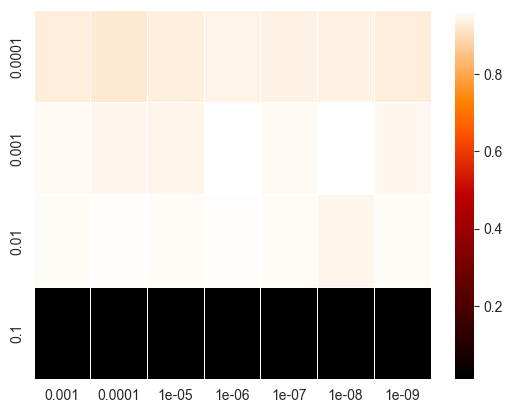

In [32]:
ax = sns.heatmap(accuracy_historic_prelu, linewidths=0.5, cmap='gist_heat', 
                 xticklabels=reg_choices, 
                 yticklabels=lr_choices)
ax.set(xlabel='weight decay', ylabel='learning rate')

In [33]:
best_params_prelu

(0.001, 1e-06)

### Complete learning with the best hyperparameters

In [30]:
model.set_optimizer(optim='SGD', lr=best_params_prelu[0], reg=best_params_prelu[1])
loss_train, accuracy_train, loss_test, accuracy_test = model.training(X_train, t_train, X_test, t_test, tol=1e-5)

Epoch 1/500, Loss: 4.59214, Accuracy: 1.88%
Epoch 2/500, Loss: 4.48999, Accuracy: 2.74%
Epoch 3/500, Loss: 3.59460, Accuracy: 12.99%
Epoch 4/500, Loss: 1.84075, Accuracy: 46.90%
Epoch 5/500, Loss: 1.07754, Accuracy: 67.10%
Epoch 6/500, Loss: 0.55591, Accuracy: 83.69%
Epoch 7/500, Loss: 0.31091, Accuracy: 90.91%
Epoch 8/500, Loss: 0.30557, Accuracy: 92.21%
Epoch 9/500, Loss: 0.32867, Accuracy: 92.64%
Epoch 10/500, Loss: 0.19612, Accuracy: 96.25%
Epoch 11/500, Loss: 0.06417, Accuracy: 98.12%
Epoch 12/500, Loss: 0.10244, Accuracy: 97.26%
Epoch 13/500, Loss: 0.06703, Accuracy: 98.85%
Epoch 14/500, Loss: 0.06785, Accuracy: 98.70%
Epoch 15/500, Loss: 0.05173, Accuracy: 98.27%
Epoch 16/500, Loss: 0.15607, Accuracy: 95.24%
Epoch 17/500, Loss: 0.12903, Accuracy: 95.53%
Epoch 18/500, Loss: 0.19222, Accuracy: 96.97%
Epoch 19/500, Loss: 0.00716, Accuracy: 99.86%
Epoch 20/500, Loss: 0.00147, Accuracy: 100.00%
Epoch 21/500, Loss: 0.00095, Accuracy: 100.00%
Epoch 22/500, Loss: 0.00073, Accuracy: 100.

In [31]:
print("Model accuracy of {:.2f}% on test data".format(accuracy_test[-1]*100))

Model accuracy of 96.63% on test data


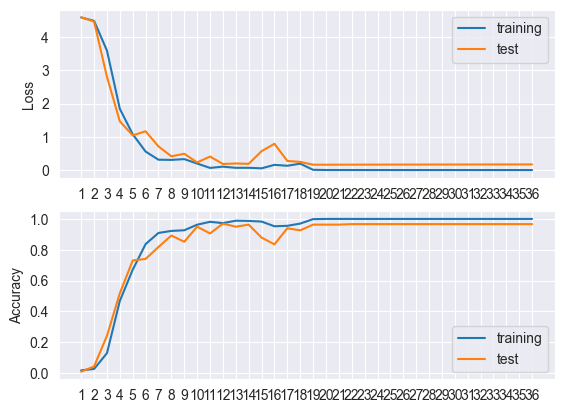

In [32]:
plot_training(loss_train, accuracy_train, loss_test, accuracy_test, 'test')